In [1]:
import itertools
import numpy as np
from numpy import mean
import pandas as pd

import sklearn
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

import joblib

%matplotlib inline

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

# Load Data

In [2]:
odf = pd.read_csv('Data/Collisions.csv')

In [3]:
odf.shape

(221738, 40)

In [4]:
odf.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

# Cleaning and Preprocessing Data

In [12]:
df = odf[['SEVERITYCODE','X','Y','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT',
          'INCDTTM','UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]

In [6]:
df.shape

(221738, 16)

In [7]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,1,2,0,0,2,1/19/2020 9:01:00 AM,N,Clear,Dry,Daylight,NaN,NaN,N
1,-122.361405,47.702064,Block,1,2,0,0,2,4/11/2005 6:31:00 PM,0,Raining,Wet,Dusk,NaN,NaN,N
2,-122.317414,47.664028,Block,2,2,0,0,2,3/31/2013 2:09:00 AM,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,N
3,-122.318234,47.619927,Intersection,2,3,1,0,1,1/6/2020 5:55:00 PM,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
4,-122.351724,47.560306,Block,2,2,0,0,1,12/25/2009 7:00:00 PM,0,Clear,Ice,Dark - Street Lights On,NaN,Y,N


In [134]:
df.dtypes

SEVERITYCODE      string
X                float64
Y                float64
ADDRTYPE           int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
UNDERINFL          int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR       int64
Month              int64
dayofweek          int64
Hour               int64
dtype: object

In [14]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

<ipython-input-14-5b63db7dadd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])


In [15]:
df['Month'] = df['INCDTTM'].dt.month
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df['Hour'] = df['INCDTTM'].dt.hour

<ipython-input-15-87f299085dd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['INCDTTM'].dt.month
<ipython-input-15-87f299085dd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['INCDTTM'].dt.dayofweek
<ipython-input-15-87f299085dd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [24]:
df.drop(['INCDTTM'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df['UNDERINFL'].value_counts()

N    104002
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [18]:
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
df[['PEDROWNOTGRNT','SPEEDING']].describe()

,PEDROWNOTGRNT,SPEEDING
count,5195,9936
unique,1,1
top,Y,Y
freq,5195,9936


In [22]:
df[['PEDROWNOTGRNT','SPEEDING']] = df[['PEDROWNOTGRNT','SPEEDING']].fillna(0)
df['PEDROWNOTGRNT'].replace(to_replace=['Y'], value=[1],inplace=True)
df['SPEEDING'].replace(to_replace=['Y'], value=[1],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
df['HITPARKEDCAR'].value_counts()

N    209649
Y     12089
Name: HITPARKEDCAR, dtype: int64

In [31]:
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Month,dayofweek,Hour
0,1,-122.356511,47.517361,Intersection,2,0,0,2,0.0,Clear,Dry,Daylight,0,0,0,1,6,9
1,1,-122.361405,47.702064,Block,2,0,0,2,0.0,Raining,Wet,Dusk,0,0,0,4,0,18
2,2,-122.317414,47.664028,Block,2,0,0,2,0.0,Clear,Dry,Dark - Street Lights On,0,0,0,3,6,2
3,2,-122.318234,47.619927,Intersection,3,1,0,1,0.0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0,17
4,2,-122.351724,47.560306,Block,2,0,0,1,0.0,Clear,Ice,Dark - Street Lights On,0,1,0,12,4,19


In [33]:
df.dropna(inplace=True)

<ipython-input-33-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [35]:
df.shape

(189581, 18)

In [37]:
df['UNDERINFL'] = df['UNDERINFL'].astype('int64')

<ipython-input-37-0ed8acff0f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNDERINFL'] = df['UNDERINFL'].astype('int64')


In [38]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Month,dayofweek,Hour
0,1,-122.356511,47.517361,Intersection,2,0,0,2,0,Clear,Dry,Daylight,0,0,0,1,6,9
1,1,-122.361405,47.702064,Block,2,0,0,2,0,Raining,Wet,Dusk,0,0,0,4,0,18
2,2,-122.317414,47.664028,Block,2,0,0,2,0,Clear,Dry,Dark - Street Lights On,0,0,0,3,6,2
3,2,-122.318234,47.619927,Intersection,3,1,0,1,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0,17
4,2,-122.351724,47.560306,Block,2,0,0,1,0,Clear,Ice,Dark - Street Lights On,0,1,0,12,4,19


In [48]:
df.reset_index(drop=True,inplace=True)

In [49]:
cols = ['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']
for i in cols:
    le = preprocessing.LabelEncoder()
    le.fit(list(df[i].values)+list(df[i].values))
    df[i] = le.transform(list(df[i].values))
    
df[['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']].value_counts

<ipython-input-49-b35927baad31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(list(df[i].values))


,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
count,189581.000000,189581.000000,189581.000000,189581.000000
mean,0.346100,3.022439,2.545324,4.379964
std,0.475727,2.803998,3.636559,1.694922
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,5.000000
75%,1.000000,6.000000,7.000000,5.000000
max,1.000000,10.000000,8.000000,8.000000


In [132]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('string')

<ipython-input-132-6bc19cfa7b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('string')


In [141]:
np.unique(df['SEVERITYCODE'].values)

array(['1', '2'], dtype=object)

In [140]:
df['SEVERITYCODE'].replace(to_replace=['2b','3','0'],value=['2','2','2'],inplace=True)

AttributeError: 'Series' object has no attribute 'values_counts'

In [142]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('int64')

<ipython-input-142-3d51c2b4bd2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('int64')


In [143]:
df['SEVERITYCODE'].replace(to_replace=[1,2], value=[0,1],inplace=True)
df['SEVERITYCODE'].value_counts()

0    129507
1     60074
Name: SEVERITYCODE, dtype: int64

In [144]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Month,dayofweek,Hour
0,0,-122.356511,47.517361,1,2,0,0,2,0,1,0,5,0,0,0,1,6,9
1,0,-122.361405,47.702064,0,2,0,0,2,0,6,8,6,0,0,0,4,0,18
2,1,-122.317414,47.664028,0,2,0,0,2,0,1,0,2,0,0,0,3,6,2
3,1,-122.318234,47.619927,1,3,1,0,1,0,6,8,2,0,0,0,1,0,17
4,1,-122.351724,47.560306,0,2,0,0,1,0,1,1,2,0,1,0,12,4,19


In [145]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'Month',
       'dayofweek', 'Hour'],
      dtype='object')

In [146]:
target = ['SEVERITYCODE']
labels = ['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'Month','dayofweek', 'Hour']

# Feature Selection

## RFE with XGBClassifier features selector 

In [57]:
from sklearn.feature_selection import RFE
import xgboost as xgb

In [59]:
rfe = RFE(xgb.XGBClassifier(n_jobs=-1, random_state=1))

rfe.fit(df[labels], df[target])

print('Selected features:')
print(labels[rfe.support_])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Selected features:


TypeError: only integer scalar arrays can be converted to a scalar index

In [61]:
print([rfe.support_])

[array([False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False, False, False])]


In [63]:
rfe.ranking_

array([ 5,  4,  1,  1,  1,  1,  1,  3,  1,  6,  1,  7,  2,  1, 10,  9,  8])

In [62]:
df[labels].columns

Index(['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'Month', 'dayofweek',
       'Hour'],
      dtype='object')

## Feature selection with ExtraTreesClassifier 

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(df[labels], df[target])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:17]

print('Top features:')
for f in range(17):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

<ipython-input-66-bc2a8b9b88f3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(df[labels], df[target])


Top features:
1. feature 11 (0.242689)
2. feature 2 (0.228604)
3. feature 5 (0.177127)
4. feature 4 (0.106905)
5. feature 8 (0.066744)
6. feature 13 (0.047288)
7. feature 10 (0.044934)
8. feature 6 (0.031340)
9. feature 9 (0.019297)
10. feature 12 (0.011117)
11. feature 7 (0.010830)
12. feature 3 (0.007596)
13. feature 1 (0.002888)
14. feature 16 (0.001845)
15. feature 15 (0.000309)
16. feature 0 (0.000263)
17. feature 14 (0.000223)


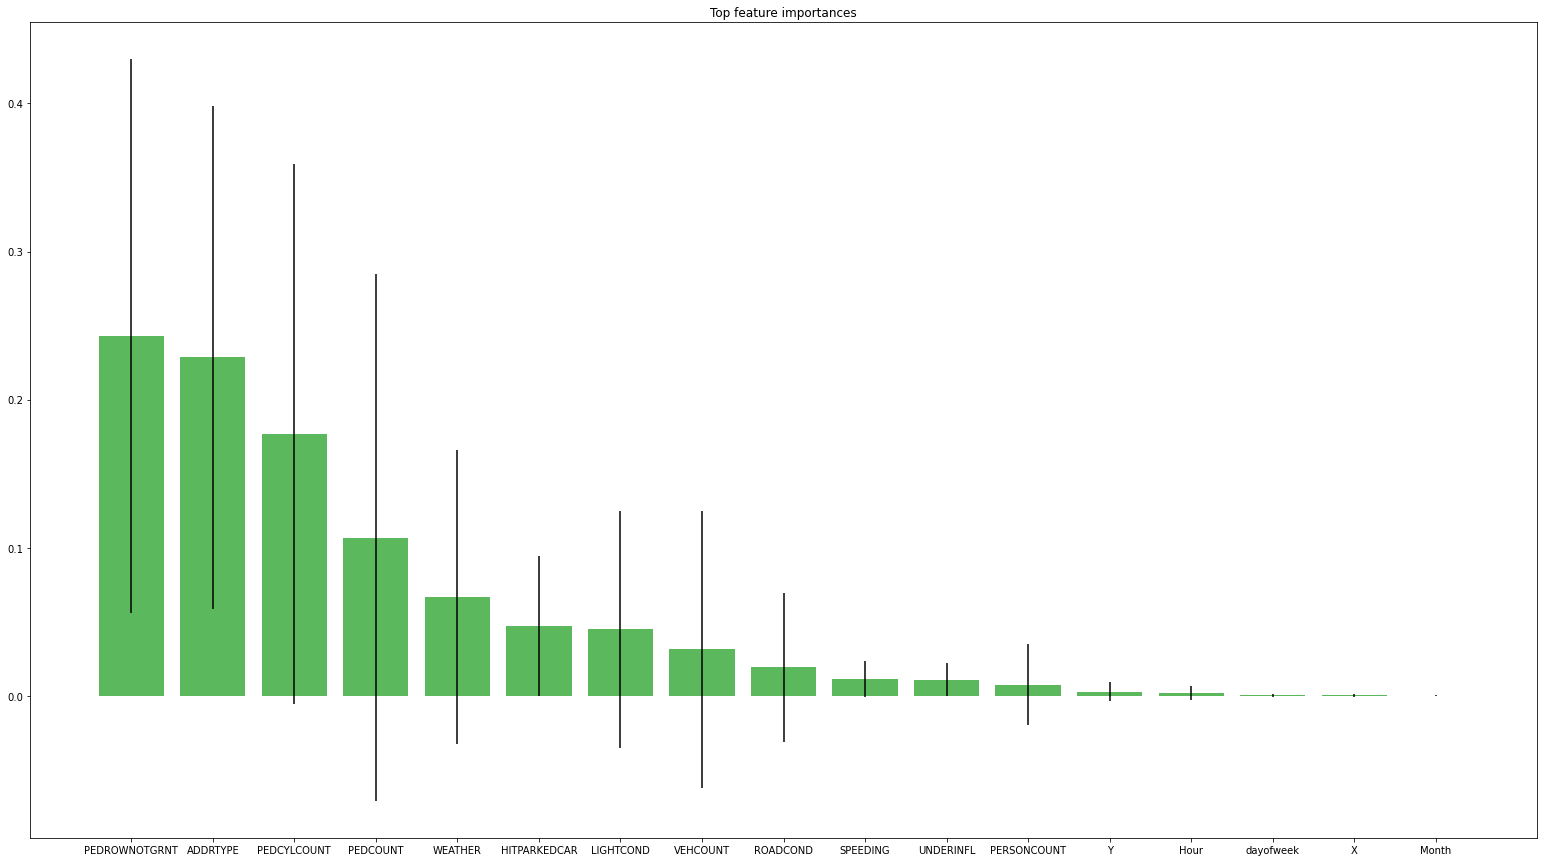

In [98]:
plt.figure(figsize=(27,15))
plt.title('Top feature importances')
plt.bar(
    range(17), 
    importances[indices],
    yerr=std[indices],
    color = ['#5cb85c'],
    )
plt.xticks(range(17), df[labels].columns[indices])
plt.show()

# Models training and testing

In [227]:
X = df[labels]
y = df[target]

In [191]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.86485115, -1.81272225,  1.37453179, -0.34210482, -0.20369016,
        -0.1794054 ,  0.0583013 , -0.22777995, -0.7212717 , -0.69992832,
         0.36582071, -0.16737056, -0.22701022, -0.19491628, -1.62254925,
         1.59016531, -0.3592176 ],
       [-1.02778015,  1.46600023, -0.72752046, -0.34210482, -0.20369016,
        -0.1794054 ,  0.0583013 , -0.22777995,  1.06190127,  1.49995953,
         0.95582008, -0.16737056, -0.22701022, -0.19491628, -0.74462989,
        -1.53123798,  0.94120524]])

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

In [153]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151664, 17) (151664, 1)
Test set: (37917, 17) (37917, 1)


## GradientBoostingClassifier

In [160]:
parameters1 = [{'learning_rate': [0.75],'n_estimators': [100],'max_depth': [2]}]
gbc = GradientBoostingClassifier()
Grid1 = GridSearchCV(gbc,parameters1)
Grid1.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.75], 'max_depth': [2],
                          'n_estimators': [100]}])

In [161]:
BestGrid1 = Grid1.best_estimator_
print(BestGrid1,'\n',"Best score for GBC:",BestGrid1.score(X_test, y_test))
print('\n',"Best score for GBC:",f1_score(y,BestGrid1.predict(X)))
print('\n',"Best score for GBC:",roc_auc_score(y,BestGrid1.predict(X),average = 'weighted'))

GradientBoostingClassifier(learning_rate=0.75, max_depth=2) 
 Best score for GBC: 0.3180103911174407

 Best score for GBC: 0.4524634222628964

 Best score for GBC: 0.6365966556494814


## XGBClassifier

In [154]:
parameters2 = [{'learning_rate': [0.75],'n_estimators': [100],'max_depth': [2]}]
xgb_c = xgb.XGBClassifier()
Grid2 = GridSearchCV(xgb_c,parameters2)
Grid2.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [155]:
BestGrid2 = Grid2.best_estimator_
print(BestGrid2,'\n',"Best score for GBC:",BestGrid2.score(X_test, y_test))
print('\n',"Best score for GBC:",f1_score(y,BestGrid2.predict(X)))
print('\n',"Best score for GBC:",roc_auc_score(y,BestGrid2.predict(X),average = 'weighted'))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 Best score for GBC: 0.7492153915130416

 Best score for GBC: 0.4442358683154609

 Best score for GBC: 0.6335272951479404


## XGBRFClassifier

In [177]:
parameters3 = [{'learning_rate': [0.75],'n_estimators': [100],'max_depth': [2]}]
xgb_rf = xgb.XGBRFClassifier()
Grid3 = GridSearchCV(xgb_rf,parameters3)
Grid3.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None,
                                       scale_pos_weight=None, tree_method=None,
                                       validate_parameters=None,
           

In [200]:
BestGrid3 = Grid3.best_estimator_
print(BestGrid3,'\n',"Best score for XGBRFC:",BestGrid3.score(X_test, y_test))
print('\n',"Best score for XGBRFC:",f1_score(y,BestGrid3.predict(X)))
print('\n',"Best score for XGBRFC:",roc_auc_score(y,BestGrid3.predict(X),average = 'weighted'))

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.75,
                max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None) 
 Best score for XGBRFC: 0.7401429437982963

 Best score for XGBRFC: 0.33713064184435537

 Best score for XGBRFC: 0.5983730703629226


## LogisticRegression

In [202]:
from sklearn.linear_model import LogisticRegression

In [210]:
parameters4 = [{'class_weight': ['None','balanced'], 'solver': ['liblinear','lbfgs'],'n_jobs':[-1]}]
clf = LogisticRegression()
Grid4 = GridSearchCV(clf,parameters4)
Grid4.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_lo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'class_weight': ['None', 'balanced'], 'n_jobs': [-1],
                          'solver': ['liblinear', 'lbfgs']}])

In [212]:
BestGrid4 = Grid4.best_estimator_
print(BestGrid4,'\n',"Best score for Logistic Regression:",BestGrid4.score(X_test, y_test))
print('\n',"Best score for Logistic Regression:",f1_score(y,BestGrid4.predict(X)))
print('\n',"Best score for Logistic Regression:",roc_auc_score(y,BestGrid4.predict(X),average = 'weighted'))

LogisticRegression(class_weight='None', n_jobs=-1) 
 Best score for Logistic Regression: 0.7411451327900415

 Best score for Logistic Regression: 0.40071551936836913

 Best score for Logistic Regression: 0.6168554778152223


## XGBClassifier with SMOTE technique

In [184]:
X = df[labels]
y = df[target]

In [179]:
from imblearn.over_sampling import SMOTE

In [180]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df[labels], df[target], test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (151664, 17) (151664, 1)
Test set: (37917, 17) (37917, 1)


In [214]:
from mlxtend.classifier import StackingClassifier

In [181]:
smote = SMOTE(sampling_strategy=0.7)
Xsm,ysm = smote.fit_resample(X2_train,y2_train)

In [187]:
X = preprocessing.StandardScaler().fit(X).transform(X)
Xsm = preprocessing.StandardScaler().fit(Xsm).transform(Xsm)
X2_test = preprocessing.StandardScaler().fit(X2_test).transform(X2_test)

In [224]:
parameters5 = [{'learning_rate': [0.75],'n_estimators': [100],'max_depth': [2]}]
xgb_sm = xgb.XGBClassifier()
Grid5 = GridSearchCV(xgb_c,parameters5)
Grid5.fit(Xsm,ysm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [225]:
BestGrid5 = Grid5.best_estimator_
print(BestGrid5,'\n',"Best score for SMOTE:",BestGrid5.score(X2_test, y2_test))
print('\n',"Best score for SMOTE:",f1_score(y,BestGrid5.predict(X)))
print('\n',"Best score for SMOTE:",roc_auc_score(y,BestGrid5.predict(X),average = 'weighted'))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 Best score for SMOTE: 0.719940923596276

 Best score for SMOTE: 0.5338002436053593

 Best score for SMOTE: 0.6639437763169402


## Saving best models

In [226]:
joblib.dump(BestGrid1,'Models/GBC.sav')
joblib.dump(BestGrid2,'Models/XGBC.sav')
joblib.dump(BestGrid3,'Models/XGBRFC.sav')
joblib.dump(BestGrid4,'Models/LogReg.sav')
joblib.dump(BestGrid5,'Models/XGBC_SM.sav')

['Models/XGBC_SM.sav']